<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install matplotlib-venn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [40]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [11]:
## Write your code here
#display the column names 
print(df.columns.tolist())

#display data types

df.dtypes
print(df.dtypes)

#display summary information
df.info()



['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [12]:
#display the dataset's shape:
print(df.shape)

(65437, 114)


In [7]:
#display statistics of only numerical columns
print(df.describe())

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

In [13]:
#display available variables:
%whos

Variable   Type         Data/Info
---------------------------------
data       list         n=1
data_url   str          https://cf-courses-data.s<...>520flujwQ/survey-data.csv
df         DataFrame           ResponseId        <...>65437 rows x 114 columns]
np         module       <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns        module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [14]:
## Write your code here
#count missing values per column
print(df.isna().sum())



ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [15]:
#print missing values

missing_data = df.isnull()

print(missing_data.head(10))


   ResponseId  MainBranch    Age  Employment  RemoteWork  Check  \
0       False       False  False       False       False  False   
1       False       False  False       False       False  False   
2       False       False  False       False       False  False   
3       False       False  False       False        True  False   
4       False       False  False       False        True  False   
5       False       False  False       False        True  False   
6       False       False  False       False       False  False   
7       False       False  False       False        True  False   
8       False       False  False       False       False  False   
9       False       False  False       False       False  False   

   CodingActivities  EdLevel  LearnCode  LearnCodeOnline  ...  JobSatPoints_6  \
0             False    False      False             True  ...            True   
1             False    False      False            False  ...           False   
2             False

In [16]:
#count the numbers of missing values in a particular column:

df['YearsCodePro'].isnull().sum()

np.int64(13827)

In [17]:
#checking type of specific column
print(df['YearsCodePro'].dtype)

object


In [18]:
df=df.dropna(subset=['YearsCodePro','JobSat','RemoteWork'])

In [19]:
df['EdLevel'].isnull().sum()

np.int64(0)

In [20]:
df=df.dropna(subset=['EdLevel'])
df['EdLevel'].isnull().sum()

np.int64(0)

In [21]:
df['LanguageHaveWorkedWith'].isnull().sum()

np.int64(85)

In [22]:
df['LanguageWantToWorkWith'].isnull().sum()

np.int64(1430)

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [23]:
#Calculate the value counts for each column
df['Employment'].value_counts()



Employment
Employed, full-time                                                                                                                                                                                                     21900
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 2231
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1241
Employed, part-time                                                                                                                                                                                                       530
Employed, full-time;Student, part-time                                                               

In [24]:
df['JobSat'].value_counts()

JobSat
8.0     7322
7.0     6240
6.0     3651
9.0     3555
10.0    2195
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64

In [25]:
df['YearsCodePro'].value_counts()

YearsCodePro
3                     2261
2                     2151
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     818
11                     806
Less than 1 year       779
13                     703
14                     628
16                     577
18                     526
25                     504
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                     216
27                     212
28                     170
35                     122
29                     100
32                     100
40                      90
33                      72
34                      72
36             

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


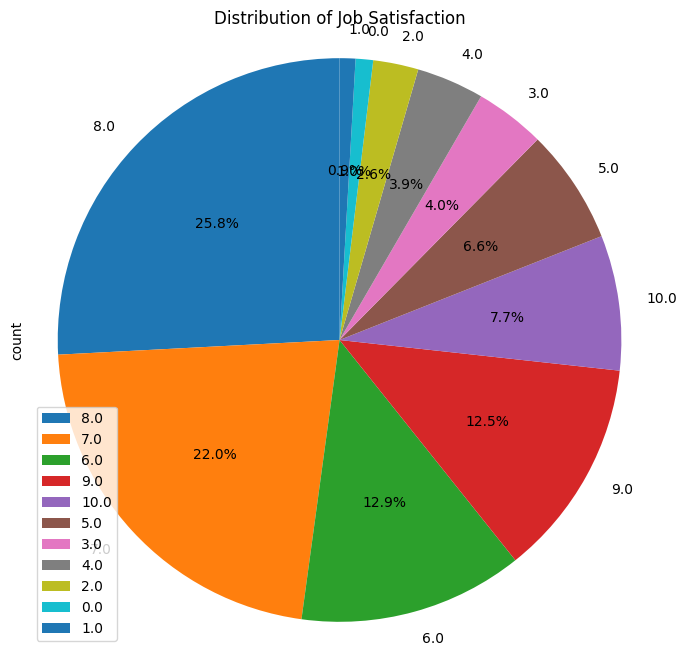

In [26]:
## Write your code here
# Calculate the value counts for the column
counts = df['JobSat'].value_counts()
# Adding labels
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['Extremely dissatisfied', 'Dissatisfied', 'Moderately dissatisfied', 'Somewhat dissatisfied', 'Neutral', 'Somewhat Satisfied','Moderately Satisfied','Satisfied','Very Satisfied','Extremely Satisfied']

# Plotting the pie chart
counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize = (8,8))

# Adding a title
plt.title('Distribution of Job Satisfaction')

# Ensuring the circle's proportion
plt.axis('equal')

#Adding a legend
plt.legend()
plt.show()





### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [27]:
## Write your code here
#Compare the frequency:



frequency_comparison = df.groupby(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']).size().reset_index(name='count')

print(frequency_comparison)



                                  LanguageHaveWorkedWith  \
0                                                    Ada   
1                                      Ada;Apex;Assembly   
2      Ada;Apex;Assembly;Bash/Shell (all shells);C#;C...   
3      Ada;Apex;Assembly;Bash/Shell (all shells);C++;...   
4      Ada;Apex;Assembly;Bash/Shell (all shells);C;C#...   
...                                                  ...   
22286                                Visual Basic (.Net)   
22287                                Visual Basic (.Net)   
22288                                Visual Basic (.Net)   
22289                                             Zephyr   
22290                                                Zig   

                                  LanguageWantToWorkWith  count  
0                                                    Ada      2  
1                                                 Prolog      1  
2      C;C#;Clojure;Dart;Elixir;F#;Go;Groovy;Haskell;...      1  
3              

In [28]:
#Venn Diagram:
%matplotlib inline
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
import pandas as pd

counts = df['LanguageWantToWorkWith'].value_counts()

# Sample DataFrames
df1 = pd.DataFrame(['LanguageWantToWorkWith'])
df2 = pd.DataFrame(['LanguageHaveWorkedWith'])
df3 = pd.DataFrame(['counts'])

# Convert DataFrames to sets (using 'id' column for comparison)
set1 = set(df1['counts'])
set2 = set(df2['counts'])
set3 = set(df3['counts'])

# Plotting Venn diagrams
plt.figure(figsize=(10, 5))

# Two-set Venn diagram
plt.subplot(1, 2, 1)
venn3([set1, set2, set3], set_labels=('LanguageWantToWorkWith', 'LanguageHaveWorkedWith', 'counts'))
plt.title('Three-Set Venn Diagram')
plt.show()

KeyError: 'counts'

In [66]:

# Group, unstack, and plot
df.groupby(['LanguageWantToWorkWith', 'LanguageHaveWorkedWith']).size().unstack().plot(kind='bar')

# Customize the plot (optional)
plt.title('Grouped Bar Chart')
plt.xlabel('LanguageWantToWorkWith')
plt.ylabel('Count')
plt.legend(title='LanguageHaveWorkedWith')
plt.show()

KeyError: 'LanguageWantToWorkWith'

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [ ]:
## Write your code here



### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


ValueError: cannot insert level_0, already exists

In [79]:
## Write your code here
def convert_to_int(value):
    if value == 'Less than 1 year':
        return 0
    try:
        return int(value)
    except ValueError:
        return None
df_less_than_one = pd.DataFrame(['YearsCodePro'])

print(df_less_than_one)




              0
0  YearsCodePro


In [67]:
def convert_to_int(value):
    if value =='More than 50 years':
        return 51
    try:
        return int(value)
    except ValueError:
        return None

df_more_than_fifty = pd.DataFrame(['YearsCodePro'])
print(df_more_than_fifty)



              0
0  YearsCodePro


In [73]:
df['YearsCodePro_int'] = df['YearsCodePro'].apply(convert_to_int)


KeyError: 'YearsCodePro'

In [ ]:
# Calculate correlation between two specific columns
correlation = df['JobSat'].corr(df['YearsCodePro'])
print(f"Correlation between JobSat and YearsCodePro:\n{correlation}")

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [47]:
import matplotlib.pyplot as plt

data = ['https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv']
df = pd.DataFrame(data)
# Write your code here
# Create cross-tabulation between Employment and Education Level
# Create cross-tabulation between Employment and Education Level
employment_education_crosstab = pd.crosstab(df['Employment'], df['EdLevel'])
print(employment_education_crosstab)

# Visualize the Cross-Tabulation with a Stacked Bar Plot
#To visualize the relationship, you can use a stacked bar plot.
# Plot a stacked bar chart
employment_education_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize plot
plt.title('Employment vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


KeyError: 'Employment'

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
